In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print('num_columns_Churn_modelling:',len(data.columns))

num_columns_Churn_modelling: 14


In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
len(data.columns)

11

In [9]:
# Names of the coloumns lowercase:
clean_column_name = []
columns = data.columns
for i in range(len(columns)):
    clean_column_name.append(columns[i].lower())
data.columns = clean_column_name

In [10]:
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
churn = data[data["exited"] == 1]
no_churn = data[data["exited"] == 0]

In [15]:
len(no_churn)

7963

In [16]:
churn.shape

(2037, 11)

In [17]:
no_churn.shape

(7963, 11)

In [20]:
data.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

In [24]:
prevalence = data['exited'].value_counts(normalize = True) 

In [25]:
prevalence

0    0.7963
1    0.2037
Name: exited, dtype: float64

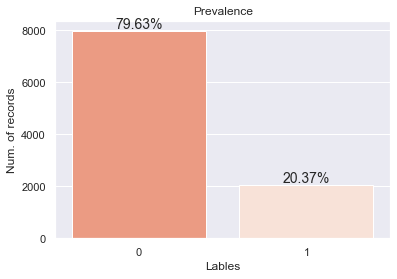

In [29]:
total_len = len(data['exited'])
sns.set()
sns.countplot(data.exited, palette=["#fc9272","#fee0d2"]).set_title('Prevalence')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Lables")
ax.set_ylabel("Num. of records")
plt.show()

In [32]:
data.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [40]:
category = ['geography', 'gender']
data = pd.get_dummies(data, columns = category, prefix = category)

In [41]:
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [33]:
# here do the box plot thing to catch the outliers

In [34]:
# Feature engineering

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
X = data.drop('exited', axis = 1)
y = data['exited']
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) creditscore                    0.239710
 2) age                            0.146917
 3) tenure                         0.144480
 4) balance                        0.141905
 5) numofproducts                  0.128330
 6) hascrcard                      0.083883
 7) isactivemember                 0.039977
 8) estimatedsalary                0.020773
 9) geography_France               0.018094
10) geography_Germany              0.009943
11) geography_Spain                0.008848
12) gender_Female                  0.008590
13) gender_Male                    0.008551


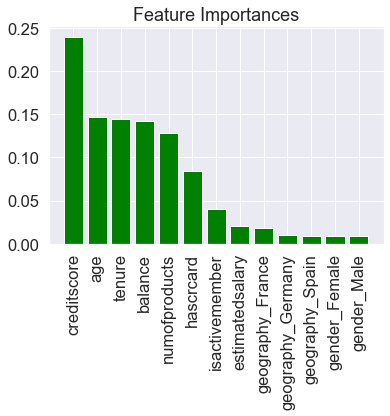

In [43]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [54]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

In [56]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [57]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])

In [58]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

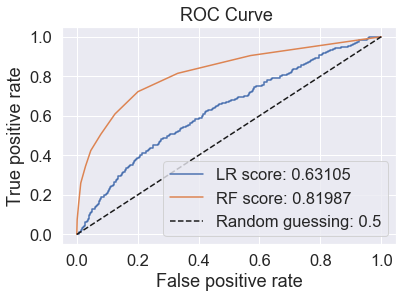

In [59]:
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()